## ATM corrected RSS spectrums for all of 2025

### Preprocessing of data

In [72]:
from hypso import Hypso1, Hypso2
import os 
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 

import funcions_autonom as f
import atmosperic_correction as ac
import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

np.random.seed(42)

dir_path = "."

In [22]:
path_cla_atm_250402 = os.path.join(dir_path, "image63N6E_2025-04-02T11-46-04Z-l1c.nc.polymer.nc")######
cla_atm_250402 = xr.open_dataset(path_cla_atm_250402)

latitude_250402 = cla_atm_250402['latitude']
longitude_250402 = cla_atm_250402['longitude']

In [23]:
path_cla_atm_250423 = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1c.nc.polymer.nc")######
cla_atm_250423 = xr.open_dataset(path_cla_atm_250423)

latitude_250423 = cla_atm_250423['latitude']
longitude_250423 = cla_atm_250423['longitude']

In [24]:
path_cla_atm_250423_2 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc.polymer.nc")######

cla_atm_250423_2 = xr.open_dataset(path_cla_atm_250423_2)
latitude_250423_2 = cla_atm_250423_2['latitude']
longitude_250423_2 = cla_atm_250423_2['longitude']

In [25]:
path_cla_atm_250504 = os.path.join(dir_path, "image62N6E_2025-05-04T11-25-43Z-l1c.nc.polymer.nc")
cla_atm_250504 = xr.open_dataset(path_cla_atm_250504)

latitude_250504 = cla_atm_250504['latitude']
longitude_250504 = cla_atm_250504['longitude']

In [26]:
path_cla_atm_250511 = os.path.join(dir_path, "image63N6E_2025-05-11T10-25-37Z.nc.polymer.nc")######
cla_atm_250511 = xr.open_dataset(path_cla_atm_250511)

latitude_250511 = cla_atm_250511['latitude']
longitude_250511 = cla_atm_250511['longitude']

In [27]:
path_cla_atm_250511_2 = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1c.nc.polymer.nc")#######
cla_atm_250511_2 = xr.open_dataset(path_cla_atm_250411_2)

latitude_250511_2 = cla_atm_250511_2['latitude']
longitude_250511_2 = cla_atm_250511_2['longitude']

In [28]:
rho_vars = [var for var in cla_atm_250423_2.variables if re.match(r'rho_w_\d+', var)]
rho_vars_sorted = sorted(rho_vars, key=lambda v: int(v.split('_')[-1])) #A variable containing the name of all the rho vaibles
rho_vars_sorted = rho_vars_sorted[5:]
print("Sorted rho variables:", rho_vars_sorted)
print(len(rho_vars_sorted))

Sorted rho variables: ['rho_w_418', 'rho_w_422', 'rho_w_425', 'rho_w_429', 'rho_w_432', 'rho_w_436', 'rho_w_439', 'rho_w_443', 'rho_w_446', 'rho_w_450', 'rho_w_453', 'rho_w_457', 'rho_w_460', 'rho_w_464', 'rho_w_467', 'rho_w_471', 'rho_w_474', 'rho_w_478', 'rho_w_481', 'rho_w_485', 'rho_w_488', 'rho_w_492', 'rho_w_495', 'rho_w_499', 'rho_w_502', 'rho_w_506', 'rho_w_509', 'rho_w_513', 'rho_w_516', 'rho_w_520', 'rho_w_523', 'rho_w_526', 'rho_w_530', 'rho_w_533', 'rho_w_537', 'rho_w_540', 'rho_w_544', 'rho_w_547', 'rho_w_551', 'rho_w_554', 'rho_w_558', 'rho_w_561', 'rho_w_565', 'rho_w_568', 'rho_w_572', 'rho_w_575', 'rho_w_579', 'rho_w_582', 'rho_w_585', 'rho_w_589', 'rho_w_592', 'rho_w_596', 'rho_w_599', 'rho_w_603', 'rho_w_606', 'rho_w_610', 'rho_w_613', 'rho_w_617', 'rho_w_620', 'rho_w_623', 'rho_w_627', 'rho_w_630', 'rho_w_634', 'rho_w_637', 'rho_w_641', 'rho_w_644', 'rho_w_648', 'rho_w_651', 'rho_w_654', 'rho_w_658', 'rho_w_661', 'rho_w_665', 'rho_w_668', 'rho_w_672', 'rho_w_675', 'r

### Defining area

In [60]:
x_1 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
x=x_1[9:118]

#target_lat = [64.17324887890479,64.11631446557637, 63.896904083590066, 63.887923483169004] #område 6.1
#target_lon = [9.582148298814932,8.924448409066027, 9.578289180688513, 8.96230357578283]

target_lat = [64.48557437461893,64.52896641587218, 64.20992561747796, 64.22009411667561] #område 7
target_lon = [9.886201113342556, 8.708294855080245,9.704720121565003,8.73032214102829]  

### Generating RSS

In [61]:
latitude_250402 = np.array(cla_atm_250402['latitude'])
longitude_250402 = np.array(cla_atm_250402['longitude'])

rss_atmc_250402 = ac.rss_atm_corrected(rho_vars_sorted, cla_atm_250402) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250402, start_end_row_col_250402 = f.latLong_to_piksel(target_lat, target_lon, latitude_250402, longitude_250402) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250402, area_in_piksel_cols_250402 = ac.piksles_in_slected_area(start_end_row_piksel_250402, start_end_row_col_250402, latitude_250402, longitude_250402)
rss_for_Area_250402 = ac.rss_given_pixels(area_in_piksel_rows_250402, area_in_piksel_cols_250402, rss_atmc_250402)

median_250402 = np.median(rss_for_Area_250402, axis=0)

normaized_spectrum_median_250402 = f.min_max_nomralization(median_250402)

l2_norm_median_250402 = np.linalg.norm(median_250402)  #l2 norm
l2_normalized_median_spectrum_250402 = median_250402 / l2_norm_median_250402  #l2 normalisering

print("number of pixels in area:", rss_for_Area_250402.shape)
print("Median RSS for area:", median_250402.shape)
print(median_250402)

number of pixels in area: (6040, 109)
Median RSS for area: (109,)
[ 1.4545352e-03 -8.8956812e-04  6.7507441e-04  2.1918342e-03
  1.8358114e-03  1.5758742e-04  4.2616110e-03  3.4307446e-03
  6.3916780e-03  4.4336780e-03  7.0349593e-03  4.5093698e-03
  5.9012715e-03  6.0761645e-03  5.6726383e-03  6.9290632e-03
  5.8098645e-03  6.0187867e-03  7.1832407e-03  6.9633732e-03
  7.0470124e-03  9.4088260e-03  7.6834112e-03  7.3731486e-03
  7.2393203e-03  5.9232619e-03  6.3583762e-03  7.2403494e-03
  7.5710556e-03  5.2930424e-03  6.8418505e-03  9.3054669e-03
  6.1671375e-03  6.2584509e-03  6.7380159e-03  6.7620953e-03
  5.4102377e-03  6.2486175e-03  5.6211464e-03  5.0973222e-03
  5.1191663e-03  5.2549168e-03  4.8404657e-03  4.8724394e-03
  3.9877277e-03  4.2313091e-03  3.9539188e-03  3.6875175e-03
  4.3610167e-03  5.0809132e-03  3.1562138e-03  3.1509227e-03
  3.1090337e-03  2.8916034e-03  2.9442185e-03  2.8689294e-03
  2.6819394e-03  2.6926473e-03  2.0369189e-03  2.0606392e-03
  1.3368698e-03  1.

In [62]:
latitude_250423 = np.array(cla_atm_250423['latitude'])
longitude_250423 = np.array(cla_atm_250423['longitude'])

rss_atmc_250423 = ac.rss_atm_corrected(rho_vars_sorted, cla_atm_250423) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel, start_end_row_col = f.latLong_to_piksel(target_lat, target_lon, latitude_250423, longitude_250423) #Får ut pisklene tilørende punktene
area_in_piksel_rows, area_in_piksel_cols = ac.piksles_in_slected_area(start_end_row_piksel, start_end_row_col, latitude_250423, longitude_250423)
rss_for_Area = ac.rss_given_pixels(area_in_piksel_rows, area_in_piksel_cols, rss_atmc_250423)

median_250423 = np.median(rss_for_Area, axis=0)

normaized_spectrum_median_250423 = f.min_max_nomralization(median_250423)

l2_norm_median_250423 = np.linalg.norm(median_250423)  #l2 norm
l2_normalized_median_spectrum_250423 = median_250423 / l2_norm_median_250423  #l2 normalisering

print("number of pixels in area:", rss_for_Area.shape)
print("Median RSS for area:", median_250423.shape)
print(median_250423)

number of pixels in area: (9783, 109)
Median RSS for area: (109,)
[ 0.0021067  -0.00108     0.00116536  0.00454102  0.00093609 -0.00134838
  0.00473722  0.0029392   0.0074434   0.00436916  0.00931668  0.00506441
  0.00719974  0.00800735  0.00737429  0.00869128  0.0072728   0.00760498
  0.00933899  0.01065873  0.00868031  0.01269887  0.01020618  0.01087177
  0.01049925  0.00855582  0.00967683  0.01130824  0.01245495  0.00811668
  0.0105922   0.01453657  0.0096994   0.01035884  0.01091419  0.01118027
  0.00904562  0.01042829  0.00955638  0.0088549   0.00916883  0.00900844
  0.00860408  0.00869612  0.00744658  0.00786316  0.00738511  0.00677588
  0.00785567  0.00902077  0.00600323  0.00612155  0.00605415  0.00556037
  0.00560309  0.00550472  0.00525384  0.00521966  0.00423965  0.0044321
  0.00348146  0.00325466  0.00348323  0.00316353  0.00347725  0.00297331
  0.00264746  0.00232886  0.00235908  0.00138581  0.00190126  0.00183382
  0.00168385  0.00179122  0.00148396  0.00129193  0.0010453

In [63]:
latitude_250423_2 = np.array(cla_atm_250423_2['latitude'])
longitude_250423_2 = np.array(cla_atm_250423_2['longitude'])

rss_atmc_250423_2 = ac.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_2) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_2, start_end_row_col_2 = f.latLong_to_piksel(target_lat, target_lon, latitude_250423_2, longitude_250423_2) #Får ut pisklene tilørende punktene
area_in_piksel_rows_2, area_in_piksel_cols_2 = ac.piksles_in_slected_area(start_end_row_piksel_2, start_end_row_col_2, latitude_250423_2, longitude_250423_2)
rss_for_Area_2 = ac.rss_given_pixels(area_in_piksel_rows_2, area_in_piksel_cols_2, rss_atmc_250423_2)

median_250423_2 = np.median(rss_for_Area_2, axis=0)

normaized_spectrum_median_250423_2 = f.min_max_nomralization(median_250423_2)

l2_norm_median_250423_2 = np.linalg.norm(median_250423_2)  #l2 norm
l2_normalized_median_spectrum_250423_2 = median_250423_2 / l2_norm_median_250423_2  #l2 normalisering

print("number of pixels in area:", rss_for_Area_2.shape)
print("Median RSS for area:", median_250423_2.shape)
print(median_250423_2)

number of pixels in area: (1218, 109)
Median RSS for area: (109,)
[ 1.68289337e-03 -9.67771048e-04  1.22166728e-03  4.05010581e-03
  1.59553601e-05 -1.71671854e-03  3.77034931e-03  2.15157634e-03
  6.17656484e-03  3.58445034e-03  7.88907334e-03  4.23180312e-03
  6.02187589e-03  6.73805550e-03  6.18717819e-03  7.25084869e-03
  5.99605450e-03  6.22820389e-03  7.73900747e-03  8.91118683e-03
  7.10627437e-03  1.06128175e-02  8.44858773e-03  9.06937569e-03
  8.70766677e-03  7.02194404e-03  7.97603279e-03  9.44847427e-03
  1.04385614e-02  6.68616593e-03  8.83915089e-03  1.22066559e-02
  8.09199736e-03  8.62788968e-03  9.14475974e-03  9.37682576e-03
  7.56411348e-03  8.74026492e-03  8.02761689e-03  7.43285473e-03
  7.69682042e-03  7.54450727e-03  7.19051808e-03  7.25637935e-03
  6.13291375e-03  6.46399055e-03  6.06131088e-03  5.58709400e-03
  6.60189893e-03  7.59960059e-03  4.97421855e-03  5.11934562e-03
  5.11143683e-03  4.71762195e-03  4.76388726e-03  4.68956353e-03
  4.45852242e-03  4.4363

In [64]:
latitude_250504 = np.array(cla_atm_250504['latitude'])
longitude_250504 = np.array(cla_atm_250504['longitude'])

rss_atmc_250504 = ac.rss_atm_corrected(rho_vars_sorted, cla_atm_250504) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250504, start_end_row_col_250504 = f.latLong_to_piksel(target_lat, target_lon, latitude_250504, longitude_250504) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250504, area_in_piksel_cols_250504 = ac.piksles_in_slected_area(start_end_row_piksel_250504, start_end_row_col_250504, latitude_250504, longitude_250504)
rss_for_Area_250504 = ac.rss_given_pixels(area_in_piksel_rows_250504, area_in_piksel_cols_250504, rss_atmc_250504)

median_250504 = np.median(rss_for_Area_250504, axis=0)

normaized_spectrum_median_250504 = f.min_max_nomralization(median_250504)

l2_norm_median_250504 = np.linalg.norm(median_250504)  #l2 norm
l2_normalized_median_spectrum_250504 = median_250504 / l2_norm_median_250504  #l2 normalisering

print("number of pixels in area:", rss_for_Area_250504.shape)
print("Median RSS for area:", median_250504.shape)
print(median_250504)

number of pixels in area: (195, 109)
Median RSS for area: (109,)
[-1.2423167e-03 -3.5553370e-03 -1.6065090e-03  7.0022873e-04
  4.6388817e-04 -1.2609860e-03  3.6638731e-03  2.9146853e-03
  6.5675885e-03  4.4135829e-03  7.8039803e-03  4.9757464e-03
  6.7339763e-03  7.0981905e-03  6.8818587e-03  8.4011629e-03
  7.3791589e-03  7.6005817e-03  8.9992220e-03  8.7910341e-03
  9.0674572e-03  1.2042391e-02  1.0011523e-02  9.8621743e-03
  9.9366000e-03  8.4260590e-03  9.1149667e-03  1.0459289e-02
  1.1051271e-02  8.3226105e-03  1.0349748e-02  1.4023139e-02
  9.5524928e-03  9.7086150e-03  1.0419024e-02  1.0548454e-02
  8.6530093e-03  9.9438215e-03  9.0681743e-03  8.4067993e-03
  8.3714584e-03  8.7527921e-03  8.0478741e-03  8.1802215e-03
  7.0154592e-03  7.3654391e-03  6.9677695e-03  6.5965415e-03
  7.7654351e-03  9.0094041e-03  5.8937743e-03  5.8721043e-03
  5.8277077e-03  5.5511668e-03  5.6733484e-03  5.6338515e-03
  5.3005829e-03  5.4859216e-03  4.3391841e-03  4.4121603e-03
  3.1984360e-03  2.9

In [65]:
latitude_250511 = np.array(cla_atm_250511['latitude'])
longitude_250511 = np.array(cla_atm_250511['longitude'])

rss_atmc_250511 = ac.rss_atm_corrected(rho_vars_sorted, cla_atm_250511) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250511, start_end_row_col_250511 = f.latLong_to_piksel(target_lat, target_lon, latitude_250511, longitude_250511) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250511, area_in_piksel_cols_250511 = ac.piksles_in_slected_area(start_end_row_piksel_250511, start_end_row_col_250511, latitude_250511, longitude_250511)
rss_for_Area_250511 = ac.rss_given_pixels(area_in_piksel_rows_250511, area_in_piksel_cols_250511, rss_atmc_250511)

median_250511 = np.median(rss_for_Area_250511, axis=0)

normaized_spectrum_median_250511 = f.min_max_nomralization(median_250511)

l2_norm_median_250511 = np.linalg.norm(median_250511)  #l2 norm
l2_normalized_median_spectrum_250511 = median_250511 / l2_norm_median_250511  #l2 normalisering

print("number of pixels in area:", rss_for_Area_250511.shape)
print("Median RSS for area:", median_250511.shape)
print(median_250511)

number of pixels in area: (35, 109)
Median RSS for area: (109,)
[ 8.14119179e-04 -1.83263363e-03 -1.14371316e-04  1.89773727e-03
  1.03770429e-03 -2.92160228e-04  3.78723931e-03  3.12975445e-03
  6.34839153e-03  4.80881194e-03  7.20436871e-03  4.81923204e-03
  6.08449895e-03  6.67025009e-03  6.01485418e-03  7.46570481e-03
  6.31995592e-03  6.53644092e-03  8.18866491e-03  7.93206878e-03
  7.66279828e-03  1.06057199e-02  8.67574662e-03  8.62441119e-03
  8.48904531e-03  7.16141379e-03  7.80358538e-03  8.89048725e-03
  9.25281271e-03  6.79472601e-03  8.74886289e-03  1.14891725e-02
  7.88747985e-03  7.90877920e-03  8.65990389e-03  8.52238107e-03
  7.08752265e-03  8.07875674e-03  7.26251397e-03  6.82737492e-03
  6.73633954e-03  6.93283649e-03  6.46635750e-03  6.51226193e-03
  5.52214123e-03  5.78193925e-03  5.44615276e-03  5.05491486e-03
  5.67310397e-03  6.30487688e-03  4.12914017e-03  4.11185762e-03
  4.19541728e-03  3.96798411e-03  4.03294666e-03  3.84433707e-03
  3.70551203e-03  3.677465

In [66]:
latitude_250511_2 = np.array(cla_atm_250511_2['latitude'])
longitude_250511_2 = np.array(cla_atm_250511_2['longitude'])

rss_atmc_250511_2 = ac.rss_atm_corrected(rho_vars_sorted, cla_atm_250511_2) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250511_2, start_end_row_col_250511_2 = f.latLong_to_piksel(target_lat, target_lon, latitude_250511_2, longitude_250511_2) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250511_2, area_in_piksel_cols_250511_2 = ac.piksles_in_slected_area(start_end_row_piksel_250511_2, start_end_row_col_250511_2, latitude_250511_2, longitude_250511_2)
rss_for_Area_250511_2 = ac.rss_given_pixels(area_in_piksel_rows_250511_2, area_in_piksel_cols_250511_2, rss_atmc_250511_2)

median_250511_2 = np.median(rss_for_Area_250511_2, axis=0)

normaized_spectrum_median_250511_2 = f.min_max_nomralization(median_250511_2)

l2_norm_median_250511_2 = np.linalg.norm(median_250511_2)  #l2 norm
l2_normalized_median_spectrum_250511_2 = median_250511_2 / l2_norm_median_250511_2  #l2 normalisering

print("number of pixels in area:", rss_for_Area_250511_2.shape)
print("Median RSS for area:", median_250511_2.shape)
print(median_250511_2)

number of pixels in area: (1176, 109)
Median RSS for area: (109,)
[ 0.00287947  0.00031954  0.0023263   0.00501946  0.00105661 -0.00067086
  0.00461528  0.00296033  0.00688118  0.00433447  0.00850841  0.00494343
  0.00666653  0.00738918  0.00679787  0.00782967  0.00660276  0.00682716
  0.00828495  0.00945346  0.0076573   0.01108935  0.00891003  0.0094815
  0.00907159  0.00728773  0.00824123  0.00968598  0.01062921  0.00686983
  0.00900149  0.01234887  0.0082052   0.00873358  0.00923754  0.00940328
  0.007547    0.00870723  0.00797504  0.00735245  0.00760917  0.00741212
  0.00705692  0.00705534  0.00589161  0.00621243  0.00581179  0.00529957
  0.00626627  0.00704744  0.00425503  0.00444412  0.00454746  0.00426318
  0.00435558  0.00429758  0.00407871  0.00408226  0.00321329  0.00341628
  0.00252225  0.00227161  0.00253598  0.0023052   0.00265464  0.00221636
  0.00179473  0.00148303  0.00161586  0.00070577  0.00133088  0.00130625
  0.00117918  0.00126029  0.00096016  0.00077942  0.0005876

### Plotting RSS

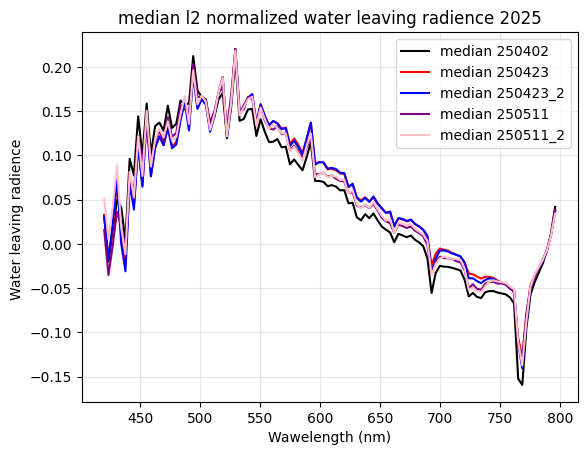

In [68]:
#plt.plot(x, median_2, color='black', label='median 250423_2')
#plt.plot(x, median, color='red', label='median 250423')

#plt.plot(x, median_250402, color='black', label='median 250402')
#plt.plot(x, median_250423, color='red', label='median 250423')
#plt.plot(x, median_250423_2, color='blue', label='median 250423_2')
##plt.plot(x, median_250504, color='green', label='median 250504')
#plt.plot(x, median_250511, color='purple', label='median 250511')
#plt.plot(x, median_250511_2, color='pink', label='median 250511_2')

plt.plot(x, l2_normalized_median_spectrum_250402, color='black', label='median 250402')
plt.plot(x, l2_normalized_median_spectrum_250423, color='red', label='median 250423')
plt.plot(x, l2_normalized_median_spectrum_250423_2, color='blue', label='median 250423_2')
#plt.plot(x, l2_normalized_median_spectrum_250504, color='green', label='median 250504')
plt.plot(x, l2_normalized_median_spectrum_250511, color='purple', label='median 250511')
plt.plot(x, l2_normalized_median_spectrum_250511_2, color='pink', label='median 250511_2')

plt.xlabel("Wawelength (nm)")
plt.ylabel("Water leaving radience ") #finne enheten her
plt.title("median l2 normalized water leaving radience 2025")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


### Clustering data preparation

In [100]:
k=4

In [101]:
l2_clustering_median_2025 = [l2_normalized_median_spectrum_250402,
                            l2_normalized_median_spectrum_250423,
                            l2_normalized_median_spectrum_250423_2,
                            #l2_normalized_median_spectrum_250504,
                            l2_normalized_median_spectrum_250511,
                            l2_normalized_median_spectrum_250511_2]

kmeans = KMeans(n_clusters=k, random_state=42)
#labels = kmeans.fit(normalized_clustering_data)
labels = kmeans.fit_predict(l2_clustering_median_2025)

In [102]:
print(labels)

[1 0 0 2 3]


### Clustering plotting

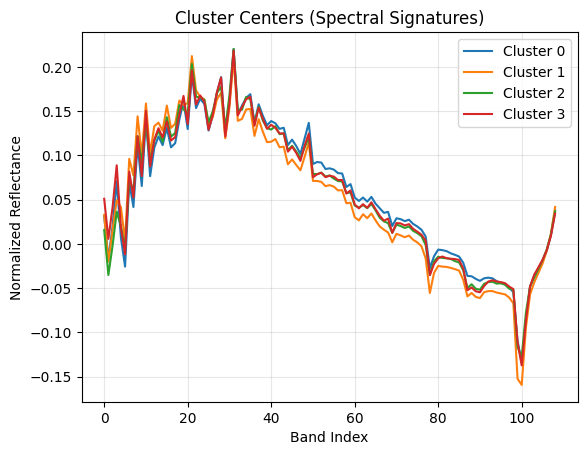

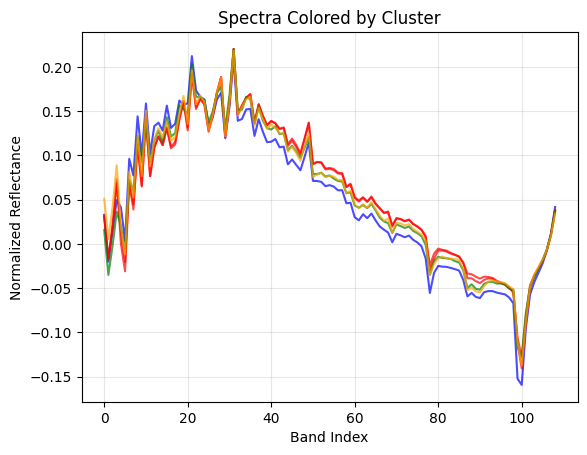

Cluster 1: ['median_250402']
Cluster 0: ['median_250423', 'median_250423_2']
Cluster 2: ['median_250511']
Cluster 3: ['median_250511_2']


In [103]:
for i, center in enumerate(kmeans.cluster_centers_):
    plt.plot(center, label=f'Cluster {i}')
plt.xlabel('Band Index')
plt.ylabel('Normalized Reflectance')
plt.title('Cluster Centers (Spectral Signatures)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'pink', 'cyan']

# Plot each spectrum, colored by its assigned cluster
for spectrum, label in zip(l2_clustering_median_2025, labels): #********************************************'
    plt.plot(spectrum, color=colors[label], alpha=0.7)

plt.xlabel('Band Index')
plt.ylabel('Normalized Reflectance')
plt.title('Spectra Colored by Cluster')
plt.grid(True, alpha=0.3)
plt.show()

spectrum_names_2025 = [
    "median_250402",
    "median_250423",
    "median_250423_2",
    #"median_250504",
    "median_250511",
    "median_250511_2"
]

# Dictionary to hold spectra grouped by cluster
clusters = defaultdict(list)

# Group spectrum names by their assigned cluster
for name, label in zip(spectrum_names_2025, labels): #*******************************************
    clusters[label].append(name)

# Print the result
for cluster_id, names in clusters.items():
    print(f"Cluster {cluster_id}: {names}")

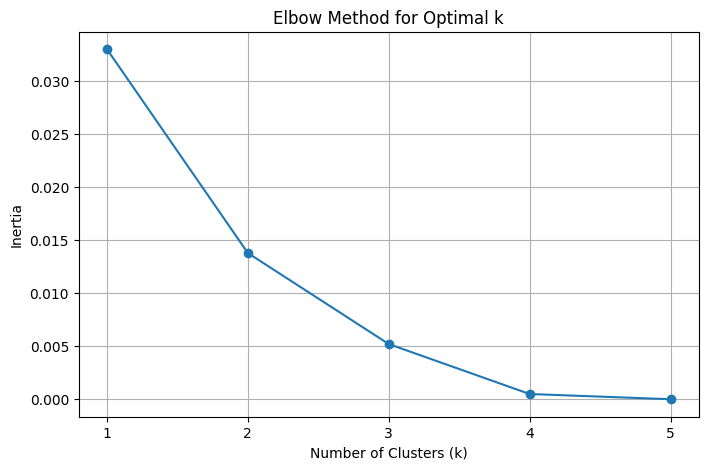

In [104]:
## elbow plot

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try different values of k
inertias = []
k_values = range(1, 6)  # Try k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(l2_clustering_median_2025) ##********************************************
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

